# Exploratory Analysis - 2

#### This analysis is to explore if there is a trend in wins registered by Constructors, based on points they earn in each race. Though this is the official way of declaring the winner (covered in Analysis 1),  this helps us see if there is a differing trend from the official way.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
#Load files for analysis
results_df = pd.read_csv('../Resources/Dataset/results.csv')
circuits_df = pd.read_csv('../Resources/Dataset/circuits.csv')
constructor_results_df = pd.read_csv('../Resources/Dataset/constructor_results.csv')
constructors_df = pd.read_csv('../Resources/Dataset/constructors.csv')
drivers_df = pd.read_csv('../Resources/Dataset/drivers.csv')
races_df = pd.read_csv('../Resources/Dataset/races.csv')
status_df = pd.read_csv('../Resources/Dataset/status.csv')

### Merging datasets

In [3]:
# Joining datasets

#join results with drivers datasets
res_dr_df = pd.merge(results_df,drivers_df,how='left',on='driverId', suffixes=('_res','_drv'))

#join status dataset
res_dr_df_st = pd.merge(res_dr_df, status_df, how='left', on='statusId', suffixes=('_mer1', 'st'))

#join races with results
res_dr_ra_df = pd.merge(res_dr_df_st,races_df,how='left',on='raceId', suffixes=('_mer2','_rac'))

#join circuit dataset
res_dr_ra_cir_df = pd.merge(res_dr_ra_df,circuits_df,how='left', on='circuitId', suffixes=('_mer3','_cir'))

#join the above with constructor data
merged_df = pd.merge(res_dr_ra_cir_df,constructors_df,how='left',on='constructorId', suffixes=('_mer4','_con'))

In [4]:
#Drop columns that are not necessary
merged_df = merged_df.drop(columns=['number_res','points','laps','fastestLap','rank','round',\
                                    'statusId','number_drv','code','url_mer2','url_rac','url_mer4',\
                                    'url_con','time_rac'])

In [5]:
#Replace '\N' with 0 and convert to numeric
merged_df['position'] = merged_df['position'].replace({'\\N':0})
merged_df['position'] = pd.to_numeric(merged_df['position'])

In [6]:
#Replace all values that have 'laps' at the end in the status column to 'Finished' 
#as these racers are finished the race anyway
merged_df['status'] = merged_df.status.str.replace("\+\d\s\w*|\+\d\d\s\w*", 'Finished')

C:\Users\User\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


## Constructor Wins (Points)

In [8]:
#Merging dataframes and group by raceid
race_grp = constructor_results_df.groupby(['raceId'], sort=True)['points'].max()
constructor_results_df2 = pd.merge(constructor_results_df, race_grp, how='left', on='raceId')
constructor_results_df2['status'].replace({"\\N":1}, inplace=True)
constructor_results_df2['status_n'] = np.where(constructor_results_df2['points_x'] == constructor_results_df2['points_y'], 1,0)

In [10]:
#merge dataframes to create final dataframe
constructor_results_df3 = pd.merge(constructor_results_df2, races_df, how='left', on='raceId')
constructor_results_df4 = pd.merge(constructor_results_df3, constructors_df, how='left', on='constructorId')

In [11]:
#drop columns that are not needed
constructor_results_df4 = constructor_results_df4.drop(columns=['url_y','url_x','constructorRef'], axis=1)

#### 2000 to 2009

In [12]:
# filter data by years
yearly = constructor_results_df4.loc[(constructor_results_df4['year']>=2000) & (constructor_results_df4['year']<=2009)]

In [13]:
# convert to dataframe
yearly_df = pd.DataFrame(yearly)

In [14]:
# group by name
cons_count = yearly_df.groupby(['name_y'])['status'].count()

In [15]:
# transform data to get the percentage of wins by constructor
cwc = yearly_df.groupby(['name_y']).sum()
cons_count_merged = pd.merge(cons_count, cwc, how='left', on='name_y')
cons_count_merged = cons_count_merged.rename(columns={'status':'races','status_n':'wins'})
cons_count_merged['w_perc'] = (cons_count_merged['wins'] / cons_count_merged['races']) * 100
cons_count_merged = cons_count_merged.sort_values(ascending=False, by='w_perc')

In [16]:
#convert index to list for x-axis
x_axis = cons_count_merged.index.tolist()

In [17]:
# creating y-axis
y_axis = cons_count_merged.groupby(['name_y'], sort=False)['w_perc'].sum().sort_values(ascending=False)

<Figure size 432x288 with 0 Axes>

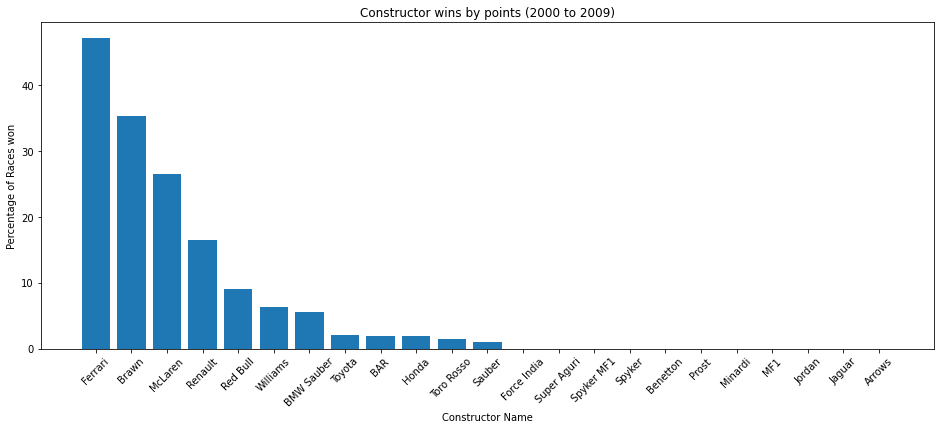

In [18]:
# Plot both axis
fig = plt.figure()
plt.figure(figsize=(16,6))
plt.bar(x_axis, y_axis)
plt.title('Constructor wins by points (2000 to 2009)')
plt.xlabel("Constructor Name")
plt.ylabel("Percentage of Races won")
plt.xticks(rotation=45);

#### 2010 to 2019

In [19]:
# filter data by years
yearly = constructor_results_df4.loc[(constructor_results_df4['year']>=2010) & (constructor_results_df4['year']<2020)]

In [20]:
# convert to dataframe
yearly_df = pd.DataFrame(yearly)

In [21]:
# group by name
cons_count = yearly_df.groupby(['name_y'])['status'].count()

In [22]:
# transform data to get the percentage of wins by constructor
cwc = yearly_df.groupby(['name_y']).sum()
cons_count_merged = pd.merge(cons_count, cwc, how='left', on='name_y')
cons_count_merged = cons_count_merged.rename(columns={'status':'races','status_n':'wins'})
cons_count_merged['w_perc'] = (cons_count_merged['wins'] / cons_count_merged['races']) * 100
cons_count_merged = cons_count_merged.sort_values(ascending=False, by='w_perc')

In [23]:
#convert index to list for x-axis
x_axis = cons_count_merged.index.tolist()

In [24]:
# creating y-axis
y_axis = cons_count_merged.groupby(['name_y'], sort=False)['w_perc'].sum().sort_values(ascending=False)

<Figure size 432x288 with 0 Axes>

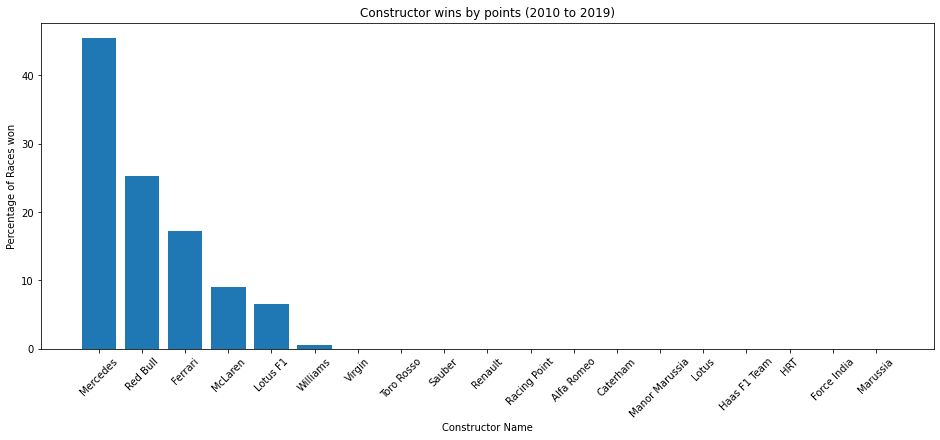

In [25]:
# Plot both axis
fig = plt.figure()
plt.figure(figsize=(16,6))
plt.bar(x_axis, y_axis)
plt.title('Constructor wins by points (2010 to 2019)')
plt.xlabel("Constructor Name")
plt.ylabel("Percentage of Races won")
plt.xticks(rotation=45);

#### Conclusion: It is evident that for the last 20 years, only a select few constructors are winning the races. It is known that these constructors spend a lot of money and respources to advance their technological capabilities.